# Identificação de objetos  

- Neste projeto, vamos utilizar uma rede neural pré-treinada chamada MobileNet
- Utilizaremos a base de dados TensorFlow Flowers 
- Código baseado na documentação abaixo: 
https://www.tensorflow.org/beta/tutorials/images/hub_with_keras


# Etapa 1: Importação das bibliotecas

In [1]:
# %tensorflow_version 2.x   # para google colab
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import zipfile
tf.__version__

C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

'2.3.0'

In [43]:
# Tensorflow é uma maneira para compartilhar modelos pré-treinados
# https://www.tensorflow.org/hub?hl=pt-br
# Exemplo para detectar se está andando de patins
#https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/action_recognition_with_tf_hub.ipynb
# Você pode disponibilizar ou usar modelos deste repositório
!pip install tensorflow_hub --upgrade
import tensorflow_hub as hub

Requirement already up-to-date: tensorflow_hub in c:\programdata\anaconda3\lib\site-packages (0.9.0)


# Etapa 2: Importação do modelo pré-treinado

In [44]:
trained_MobileNet_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" #@param {type:"string"}

In [53]:
trained_MobileNet = tf.keras.Sequential([hub.KerasLayer(trained_MobileNet_url, 
                                                        input_shape=(224,224,3))])

In [54]:
trained_MobileNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


# Etapa 3: Testes com o modelo pré-treinado

In [5]:
# para google colab
#from google.colab import drive
#drive.mount('/content/drive')

In [80]:
path = "./Transfer-Learning-Data.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [81]:
sample_image= tf.keras.preprocessing.image.load_img(r'./Transfer Learning Data/watch.jpg', 
                                                    target_size = (224, 224))

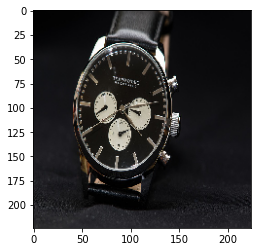

In [82]:
plt.imshow(sample_image)

In [83]:
# vamos dividir por 255 para normalizar
sample_image = np.array(sample_image) / 255.0

In [84]:
sample_image.shape

(224, 224, 3)

In [85]:
np.expand_dims(sample_image, axis = 0).shape

(1, 224, 224, 3)

In [86]:
predicted_class = trained_MobileNet.predict(np.expand_dims(sample_image, axis = 0))

In [87]:
predicted_class

array([[ 0.31979904,  0.7227224 , -0.46497285, ...,  0.25369596,
        -1.4674302 , -0.00161065]], dtype=float32)

In [88]:
len(predicted_class[0])

1001

In [89]:
predicted_class.shape

(1, 1001)

In [90]:
predicted_class = np.argmax(predicted_class)
predicted_class

827

In [91]:
# Todas as classes do imagenet estão no link abaixo
# https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [92]:
# abrir o arquivo e dividir por linhas usando splitlines()
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [93]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [94]:
len(imagenet_labels)

1001

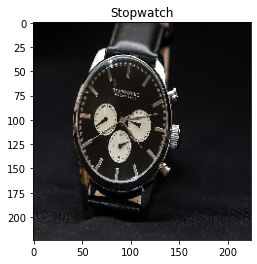

In [95]:
plt.imshow(sample_image)
predicted_class_name = imagenet_labels[predicted_class]
plt.title(predicted_class_name.title());

# Etapa 4: Testes com um conjunto de imagens

In [98]:
# Vamos carregar a base de dados do link https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
flowers_data_url = tf.keras.utils.get_file('flower_photos', 
                                           'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                            untar=True)

In [102]:
# rescale=1/255 faz a normalização
# 
print(str(flowers_data_url))
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
flower_data = image_generator.flow_from_directory(str(flowers_data_url),
                                                  target_size=(224,224),
                                                  batch_size=64,
                                                  shuffle=True)

C:\Users\ricar\.keras\datasets\flower_photos
Found 3670 images belonging to 5 classes.


In [117]:
# batch size de 64 imagens
for flowers_data_input_batch, flowers_data_label_batch in flower_data:
  print("Image batch shape: ", flowers_data_input_batch.shape)
  print("Label batch shape: ", flowers_data_label_batch.shape)
  break # irá executar apenas uma vez

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 5)


In [107]:
predictions_batch = trained_MobileNet.predict(flowers_data_input_batch)
predictions_batch.shape

(64, 1001)

In [121]:
# São 1000 classes e o último registro traz uma informação adicional
imagenet_labels.shape

(1001,)

In [141]:
predictions_batch

array([[ 0.2783675 , -0.27976072,  0.667201  , ...,  0.61888516,
        -2.8346522 , -0.10318981],
       [ 0.10511646,  0.18538114,  0.32886487, ..., -0.8769453 ,
         2.408573  ,  0.51229024],
       [ 0.17745346, -0.970646  ,  1.4758023 , ..., -1.6850381 ,
         0.4951219 ,  1.0399152 ],
       ...,
       [ 0.1092774 ,  1.3337377 ,  0.46796656, ...,  0.14256772,
         0.71729827,  0.44878727],
       [ 0.15070713, -0.48036653,  1.6077192 , ...,  0.9524921 ,
         0.89625525,  0.0771541 ],
       [ 0.34891805, -0.4082654 , -1.2510293 , ...,  1.2891726 ,
         3.1419103 , -1.5024827 ]], dtype=float32)

In [142]:
#  não queremos trazer o último registro, pois são apenas 1000 classes
predictions_batch.shape

(64, 1001)

In [129]:
# axis=-1 pois não queremos trazer o último registro, pois são apenas 1000 classes
np.argmax(predictions_batch, axis=-1)

array([990, 986, 766, 579, 986, 929, 329, 985, 986, 947, 739, 983, 986,
       999, 986, 986, 986, 997, 717, 986, 986, 645, 128, 986, 991, 310,
       991, 986, 722, 310, 310, 693, 976, 717, 986,  80, 986, 310, 310,
       884, 986, 986, 109, 946, 502, 987, 986, 992, 945, 788, 986, 717,
       985, 986, 986, 985, 869, 739, 992, 816, 986, 884, 717, 947],
      dtype=int64)

In [137]:
np.argmax(predictions_batch, axis=-1).shape

(64,)

In [27]:
predicted_class_names = imagenet_labels[np.argmax(predictions_batch, axis=-1)]
predicted_class_names

array(['sea urchin', 'picket fence', 'mask', 'feather boa',
       'coral fungus', 'daisy', 'bee', 'bell pepper', 'mushroom',
       'coral fungus', 'ice lolly', 'daisy', 'daisy', 'cardoon', 'pot',
       'daisy', 'daisy', 'daisy', 'bee', 'daisy', 'sea urchin', 'daisy',
       'cockroach', 'pinwheel', 'picket fence', 'orange', 'daisy',
       'daisy', 'bee', 'daisy', 'hip', 'rapeseed', 'daisy', 'vase',
       'picket fence', 'cup', 'cucumber', 'breastplate',
       "yellow lady's slipper", 'daisy', 'coral fungus', 'daisy', 'daisy',
       'sea anemone', 'clog', 'coral fungus', 'daisy', 'daisy', 'daisy',
       'daisy', 'ladybug', 'mailbox', 'daisy', 'Bedlington terrier',
       'swab', 'daisy', 'wool', 'feather boa', 'daisy', 'cardoon',
       'daisy', 'picket fence', 'tripod', 'pier'], dtype='<U30')

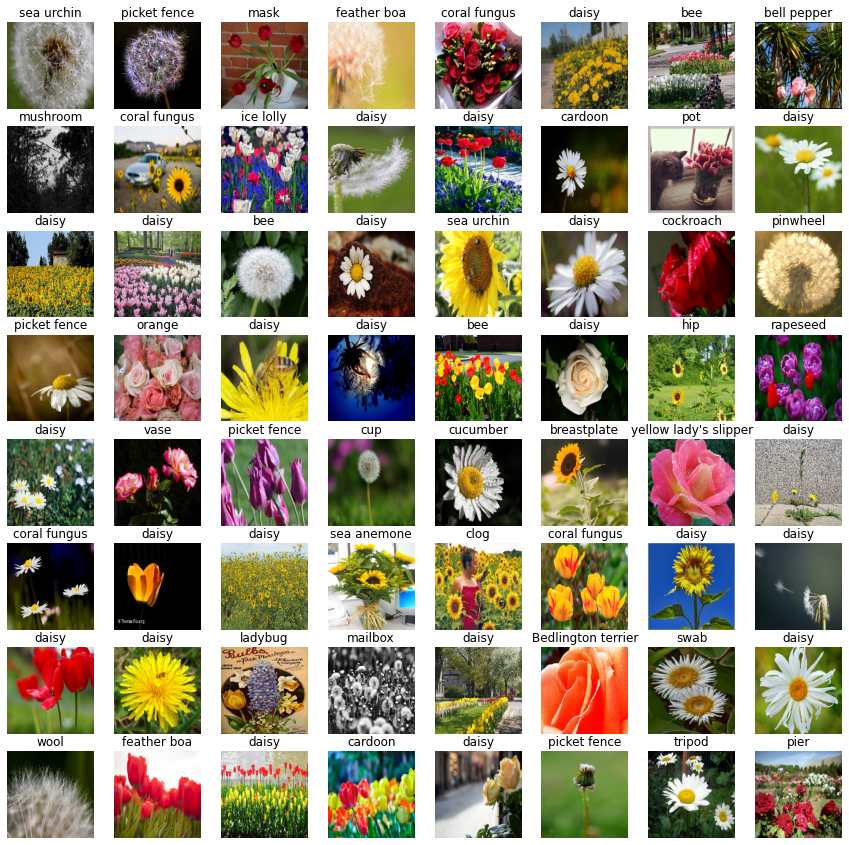

In [143]:
plt.figure(figsize=(15,15))
for n in range(64): # são 64 imagens
  plt.subplot(8,8,n+1) 
  plt.imshow(flowers_data_input_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')

# Etapa 5: Transfer learning

Download do MobileNet sem o topo do modelo:
https://tfhub.dev/s?module-type=image-feature-vector&q=tf2

Lembrando que o topo é a aquela parte que temos as camadas densas onde efetivamente temos a extração das características específicas dos objetos  

Nas camadas convolucionas temos as características gerais dos objetos e mais para o final(camadas densas) temos as características específicas dos objetos

In [157]:
MobileNet_feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" #@param {type:"string"}

In [158]:
# (224, 224, 3) 3 por ser colorida
MobileNet_feature_extractor_layer = hub.KerasLayer(MobileNet_feature_extractor_url,
                                                   input_shape=(224, 224, 3))

In [161]:
feature_batch = MobileNet_feature_extractor_layer(flowers_data_input_batch)
feature_batch.shape

# 1280 não é o resultado da rede neural densa, mas os valores que serão passados para ela. Pois não otvivemos 
#TensorShape([64, 1280])

# Interessante que as imagens possuem 224*224*3=150528 pixels e reduzimos para 1280 pixels

TensorShape([64, 1280])

In [166]:
# Não iremos treinar esta parte
MobileNet_feature_extractor_layer.trainable = False

In [170]:
flower_data.num_classes

5

In [173]:
# A primeira camada será MobileNet_feature_extractor_layer
# Iremos definir apenas uma camada densa
model = tf.keras.Sequential([MobileNet_feature_extractor_layer,
                             tf.keras.layers.Dense(flower_data.num_classes, activation='softmax')])

In [174]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_10 (KerasLayer)  (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [177]:
# Tendo nossa rede neural pronta podemos fazer uma predição
predictions = model(flowers_data_input_batch)
predictions.shape # TensorShape([64, 5]) 64 imagens e 5 saídas/classes

# Não leve em consideração, pois não fizemos o treinamento

TensorShape([64, 5])

In [178]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [179]:
epocas = 2 # antes 50
history = model.fit_generator(flower_data, epochs=epocas)

#loss: 0.8457 - accuracy:

Epoch 1/2
58/58 [==============================] - 38s 650ms/step - loss: 0.7654 - accuracy: 0.7193
Epoch 2/2
58/58 [==============================] - 38s 660ms/step - loss: 0.3860 - accuracy: 0.8698


# Etapa 6: Avaliação do modelo

In [186]:
# mostra os índices das imagens do diretório
flower_data.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [188]:
# fica no formato de dicionário
flower_data.class_indices.items()

dict_items([('daisy', 0), ('dandelion', 1), ('roses', 2), ('sunflowers', 3), ('tulips', 4)])

In [198]:
class_names = flower_data.class_indices.items()

In [200]:
class_names

dict_items([('daisy', 0), ('dandelion', 1), ('roses', 2), ('sunflowers', 3), ('tulips', 4)])

In [208]:
class_names = sorted(flower_data.class_indices.items(), key = lambda x:x[0])
# equivale ao código abaixo
#class_names = sorted(flower_data.class_indices.items())

In [209]:
class_names

[('daisy', 0),
 ('dandelion', 1),
 ('roses', 2),
 ('sunflowers', 3),
 ('tulips', 4)]

In [226]:
# ordenando pelo id
class_names = sorted(flower_data.class_indices.items(), key = lambda pair:pair[1])

In [227]:
class_names

[('daisy', 0),
 ('dandelion', 1),
 ('roses', 2),
 ('sunflowers', 3),
 ('tulips', 4)]

In [228]:
# criando array por chave
class_names = np.array([chave for chave, id in class_names])

In [230]:
class_names

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

In [233]:
predicted_batch = model.predict(flowers_data_input_batch)
predicted_id = np.argmax(predicted_batch, axis=-1) # obtendo o índice do que foi predito considerando apenas 0 a 1000
predicted_label_batch = class_names[predicted_id]

In [234]:
predicted_id

array([1, 1, 2, 1, 2, 3, 4, 2, 1, 3, 4, 1, 4, 0, 2, 0, 3, 4, 1, 0, 3, 0,
       2, 1, 0, 2, 1, 1, 4, 2, 3, 2, 0, 2, 4, 1, 0, 0, 2, 1, 0, 4, 1, 3,
       3, 4, 3, 1, 4, 1, 4, 2, 4, 2, 0, 0, 1, 4, 4, 4, 2, 1, 0, 2],
      dtype=int64)

In [235]:
predicted_label_batch

array(['dandelion', 'dandelion', 'roses', 'dandelion', 'roses',
       'sunflowers', 'tulips', 'roses', 'dandelion', 'sunflowers',
       'tulips', 'dandelion', 'tulips', 'daisy', 'roses', 'daisy',
       'sunflowers', 'tulips', 'dandelion', 'daisy', 'sunflowers',
       'daisy', 'roses', 'dandelion', 'daisy', 'roses', 'dandelion',
       'dandelion', 'tulips', 'roses', 'sunflowers', 'roses', 'daisy',
       'roses', 'tulips', 'dandelion', 'daisy', 'daisy', 'roses',
       'dandelion', 'daisy', 'tulips', 'dandelion', 'sunflowers',
       'sunflowers', 'tulips', 'sunflowers', 'dandelion', 'tulips',
       'dandelion', 'tulips', 'roses', 'tulips', 'roses', 'daisy',
       'daisy', 'dandelion', 'tulips', 'tulips', 'tulips', 'roses',
       'dandelion', 'daisy', 'roses'], dtype='<U10')

In [270]:
print(flowers_data_label_batch[:].shape)
label_id = np.argmax(flowers_data_label_batch, axis=-1)
label_id

(64, 5)


array([1, 1, 4, 1, 2, 1, 4, 2, 1, 3, 4, 1, 4, 0, 4, 0, 3, 4, 1, 0, 3, 0,
       2, 1, 0, 2, 1, 1, 4, 2, 3, 4, 0, 2, 4, 1, 0, 3, 2, 1, 0, 4, 3, 3,
       3, 4, 3, 1, 4, 1, 4, 1, 4, 2, 0, 0, 1, 4, 4, 4, 2, 1, 0, 2],
      dtype=int64)

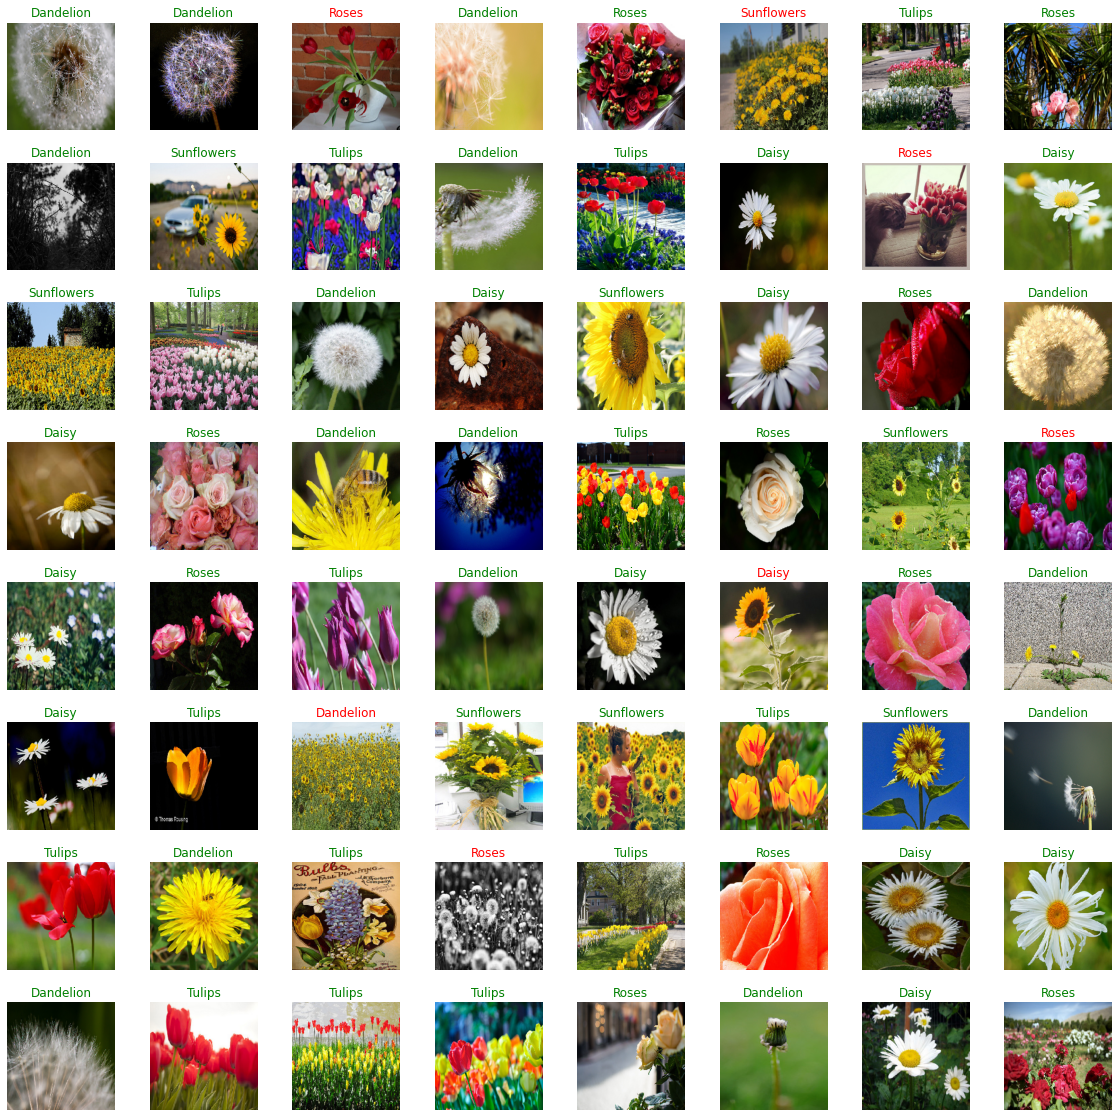

In [279]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3)

for n in range(64):
  plt.subplot(8,8,n+1) # serão plotadas 8 linhas e 8 colunas n+1 são cada uma das imagens
  plt.imshow(flowers_data_input_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red" # predição predicted_id for 
                                                               # igual label_id a cor da letra será verde senão vermelha
  plt.title(predicted_label_batch[n].title(), color=color)     # exibe o nome da respectiva imagem
  plt.axis('off')